In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np


data_label_train = np.load("/content/drive/MyDrive/Colab Notebooks/data/data_label_training.npy")
dataset_train = np.load("/content/drive/MyDrive/Colab Notebooks/data/dataset_training.npy")
data_label_test = np.load("/content/drive/MyDrive/Colab Notebooks/data/data_label_test.npy")
dataset_test = np.load("/content/drive/MyDrive/Colab Notebooks/data/dataset_test.npy")

In [ ]:
train_indices = np.arange(len(data_label_train))
test_indices = np.arange(len(data_label_test))

np.random.shuffle(train_indices)
np.random.shuffle(test_indices)

X_train, y_train = dataset_train[train_indices], data_label_train[train_indices]
X_test, y_test = dataset_test[test_indices], data_label_test[test_indices]

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(dataset_train, data_label_train, test_size=0.2, random_state=2)

X_train = X_train.astype(float)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_train = X_train / 255.0

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

X_test = X_test.astype(float)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
X_test = X_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import AUC

# VGG architecture for classification and training
# Models

def get_model_1():
    model = Sequential()
    # MyNet-5Conv-16-16-16-16-16
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("Model-1: \n", model.summary())
    return model

def get_model_2():
    model = Sequential()
    # MyNet-3Conv-32-64-128
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(4, 4)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(4, 4)))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(4, 4)))

    model.add(Flatten())
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("Model-2: \n", model.summary())
    return model

def get_model_3():
    model = Sequential()
    # MyNet-3Conv-8-16-32
    model.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(4, 4)))

    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(4, 4)))

    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(4, 4)))

    model.add(Flatten())
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("Model-3: \n", model.summary())
    return model

def get_model_4():
    model = Sequential()
    # MyNet-3Conv-128-256-512
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(4, 4)))

    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(4, 4)))

    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(4, 4)))

    model.add(Flatten())
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("Model-4: \n", model.summary())
    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, BatchNormalization, Activation, concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.applications.resnet import ResNet18
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, AveragePooling2D, Flatten, BatchNormalization
from keras.layers import concatenate
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

# Define the DenseNet121 architecture
def dense_block(x, blocks, name):
    """A dense block."""
    for i in range(blocks):
        x = conv_block(x, 32, name=name + '_block' + str(i + 1))
    return x

def transition_block(x, reduction, name):
    """A transition block."""
    x = BatchNormalization(epsilon=1.001e-5, name=name + '_bn')(x)
    x = Conv2D(int(x.shape[-1] * reduction), 1, use_bias=False, name=name + '_conv')(x)
    x = AveragePooling2D(2, strides=2, name=name + '_pool')(x)
    return x

def conv_block(x, growth_rate, name):
    """A building block for a dense block."""
    x1 = BatchNormalization(epsilon=1.001e-5, name=name + '_0_bn')(x)
    x1 = Conv2D(4 * growth_rate, 1, use_bias=False, name=name + '_1_conv')(x1)
    x1 = BatchNormalization(epsilon=1.001e-5, name=name + '_1_bn')(x1)
    x1 = Conv2D(growth_rate, 3, padding='same', use_bias=False, name=name + '_2_conv')(x1)
    x = concatenate([x, x1], name=name + '_concat')
    return x

def get_model_5():
    """Create and compile a DenseNet121 model."""
    input_shape=(128, 128, 1)
    classes=5
    learning_rate=0.001
    img_input = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, 7, strides=2, padding='same', use_bias=False, name='conv1/conv')(img_input)
    x = BatchNormalization(epsilon=1.001e-5, name='conv1/bn')(x)
    x = Dense(64, activation='relu', name='conv1/relu')(x)
    x = MaxPooling2D(3, strides=2, padding='same', name='pool1')(x)

    # Dense blocks
    x = dense_block(x, 6, name='conv2')
    x = transition_block(x, 0.5, name='pool2')
    x = dense_block(x, 12, name='conv3')
    x = transition_block(x, 0.5, name='pool3')
    x = dense_block(x, 24, name='conv4')
    x = transition_block(x, 0.5, name='pool4')
    x = dense_block(x, 16, name='conv5')

    # Final layers
    x = BatchNormalization(epsilon=1.001e-5, name='bn')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(classes, activation='softmax', name='fc')(x)

    # Create model
    model = Model(img_input, x, name='densenet121')

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    print("Model-5: \n", model.summary())
    
    return model

def get_model_6():
    # Define the ResNet18 model for an input image with dimensions 128x128x1
    inputs = tf.keras.layers.Input(shape=(128, 128, 1))
    x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)

    x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)

    x = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)

    x = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    output_layer = tf.keras.layers.Dense(5, activation='softmax')(x)

    # Create the modified ResNet18 model
    model = tf.keras.models.Model(inputs, output_layer)

    # Compile the model with an appropriate loss function, optimizer, and metrics
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Print the summary of the model architecture
    print("Model-6: \n", model.summary())

    return model


def get_model_7():

    # Define the ResNet50 model for an input image with dimensions 128x128x1
    inputs = tf.keras.layers.Input(shape=(128, 128, 1))
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = tf.keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(256, (1, 1), padding='same', activation='relu')(x)

    shortcut = tf.keras.layers.Conv2D(256, (1, 1), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(256, (1, 1), padding='same', activation='relu')(x)

    shortcut = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(512, (1, 1), padding='same', activation='relu')(x)

    shortcut = tf.keras.layers.Conv2D(512, (1, 1), strides=(2, 2), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)

    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(512, (1, 1), padding='same', activation='relu')(x)

    shortcut = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(256, (1, 1), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(1024, (1, 1), strides=(2, 2), padding='same', activation='relu')(x)

    shortcut = tf.keras.layers.Conv2D(1024, (1, 1), strides=(2, 2), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(1024, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)

    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    # Add average pooling layer and output layer
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

    # Create the model and compile it
    model = tf.keras.models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Print the summary of the model architecture
    print("Model-7: \n", model.summary())

    return model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import time
import psutil

def train_model(X_train, y_train, X_test, y_test, model, epochs):

    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test_bin))
    # Record the end time
    end_time = time.time()

    # Calculate the time taken for training
    time_taken = end_time - start_time

    print(f'Time taken for training: {time_taken:.2f} seconds')
    return history
    

def test_model(X_test, model):

    y_pred = model.predict(X_test)
    y_pred_copy = np.copy(y_pred)

    for i in range(len(y_pred)):
        y_pred[i, np.argmax(y_pred[i, :])] = 1
        y_pred[i, y_pred[i] < 1] = 0

    y_pred_ = lb.inverse_transform(y_pred)

    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(5):
        fpr[i], tpr[i], _  = roc_curve(y_test_bin[:, i], y_pred_copy[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', label='random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('One-vs-all ROC curve')
    plt.legend(loc="lower right")
    plt.show()

    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_))
    print("Classification Report: \n", classification_report(y_test, y_pred_))


def software_metrics(X_test, model):

    # # Train the model and measure RAM usage
    # process = psutil.Process()
    # start_memory = process.memory_info().rss  # Get the initial RAM usage

    # # Record the start time
    # start_time = time.time()

    # Iterate through the test dataset and predict each sample
    total_mem = 0
    total_time = 0
    total_predictions = 0
    for i in range(100):
        sample = np.expand_dims(X_test[i], axis=0)
        # Train the model and measure RAM usage
        process = psutil.Process()
        start_memory = process.memory_info().rss  # Get the initial RAM usage
            # Record the start time
        start_time = time.time()
        prediction = model.predict(sample)
            # Record the end time
        end_time = time.time()

        end_memory = process.memory_info().rss  # Get the final RAM usage
        memory_used = end_memory - start_memory
        total_mem = total_mem + memory_used

        time_taken = end_time - start_time
        total_time = total_time +time_taken
        total_predictions += 1

    # # Record the end time
    # end_time = time.time()



    # Convert memory used to kilobytes
    memory_used_mb = total_mem / (1024 * 1024) 
    
    print(f'Total predictions: {total_predictions}')
    print(f'Time taken for predictions: {total_time:.2f} seconds')
    #print(f'Total RAM used during predictions: {memory_used_mb} MB')


def save_model(model_name, model):
    model_json = model.to_json()
    with open("{}.json".format(model_name), "w") as json_file:
        json_file.write(model_json)
    model.save("{}.h5".format(model_name))
    #model.save_weights("{}.h5".format(model_name))

In [ ]:
# call each model, train it, test it and fine tune params
# Metrics to add on non-GPU processor for running the model:
### Memory requirements 
### Time taken by model for predicting on 1 image --> FPS

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      160       
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                    

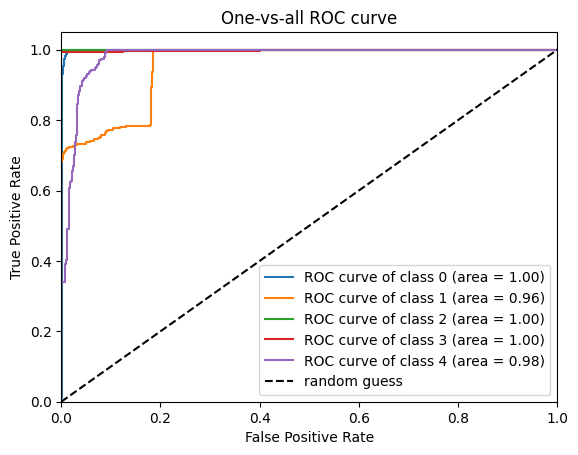

Confusion Matrix: 
 [[  0 297   0   0   3]
 [  0 300   0   0   0]
 [  0   2 253  16  29]
 [  0   0   0 298   2]
 [  0  35   0  21 244]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.47      1.00      0.64       300
           2       1.00      0.84      0.92       300
           3       0.89      0.99      0.94       300
           4       0.88      0.81      0.84       300

    accuracy                           0.73      1500
   macro avg       0.65      0.73      0.67      1500
weighted avg       0.65      0.73      0.67      1500



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_1 = get_model_1()
history1 = train_model(X_train, y_train, X_test, y_test, model_1, 40)
test_model(X_test, model_1)

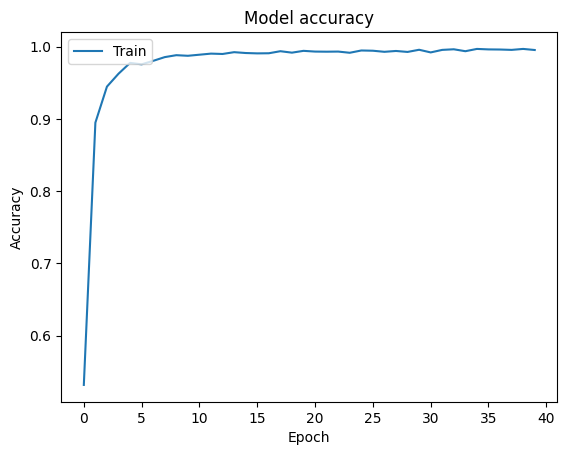

In [ ]:
plt.plot(history1.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
save_model("model_1", model_1)

In [ ]:
#change to CPU
# Load the saved model
from tensorflow.keras.models import load_model
import tensorflow as tf

loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/trained_models/model_1.h5')
software_metrics(X_test, loaded_model)

1/1 [==============================] - 0s 26ms/step
Total predictions: 100
Time taken for predictions: 9.72 seconds


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 dropout_5 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

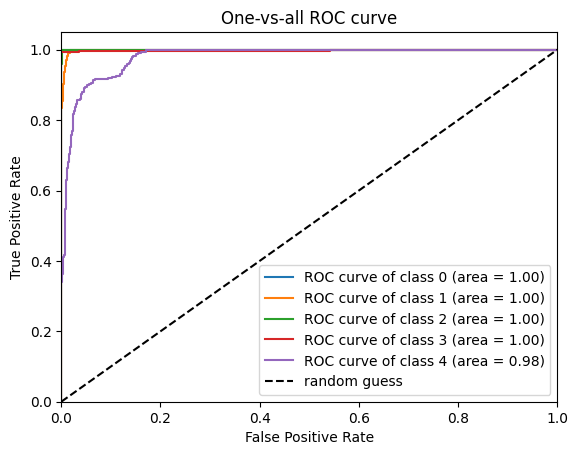

Confusion Matrix: 
 [[258  11   0   0  31]
 [  0 300   0   0   0]
 [  0   0 262   3  35]
 [  0   0   0 298   2]
 [  0  37   0   0 263]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       300
           1       0.86      1.00      0.93       300
           2       1.00      0.87      0.93       300
           3       0.99      0.99      0.99       300
           4       0.79      0.88      0.83       300

    accuracy                           0.92      1500
   macro avg       0.93      0.92      0.92      1500
weighted avg       0.93      0.92      0.92      1500



In [ ]:
model_2 = get_model_2()
history2 = train_model(X_train, y_train, X_test, y_test, model_2, 40)
test_model(X_test, model_2)

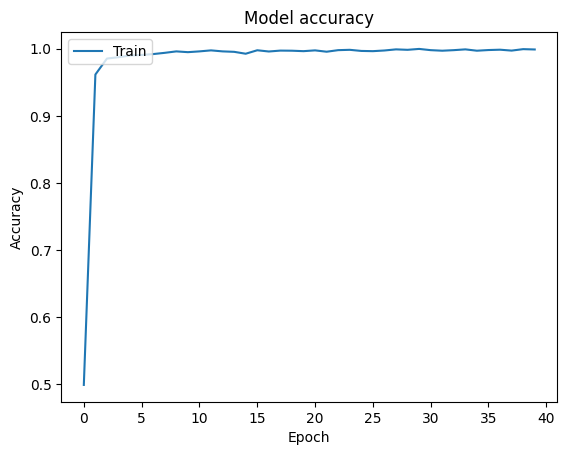

In [ ]:
plt.plot(history2.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
save_model("model_2", model_2)

In [ ]:
#change to CPU
# Load the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/trained_models/model_2.h5')
software_metrics(X_test, loaded_model)

1/1 [==============================] - 0s 29ms/step
Total predictions: 100
Time taken for predictions: 7.90 seconds


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 dropout_19 (Dropout)        (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 32, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 dropout_20 (Dropout)        (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                 

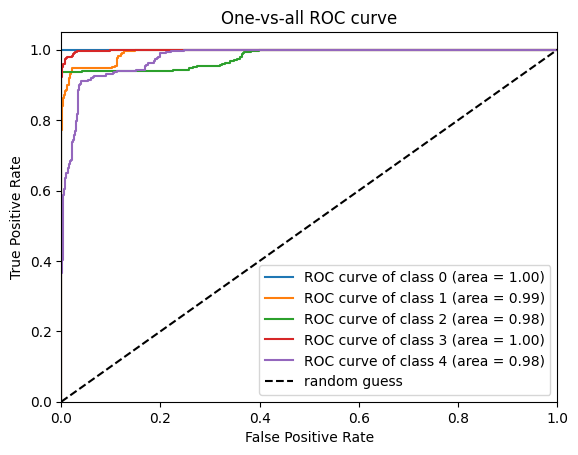

Confusion Matrix: 
 [[225  56   0   0  19]
 [  0 284   0   0  16]
 [  0   0 214  82   4]
 [  0   0   0 299   1]
 [  0  90   0   0 210]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       300
           1       0.66      0.95      0.78       300
           2       1.00      0.71      0.83       300
           3       0.78      1.00      0.88       300
           4       0.84      0.70      0.76       300

    accuracy                           0.82      1500
   macro avg       0.86      0.82      0.82      1500
weighted avg       0.86      0.82      0.82      1500



In [ ]:
model_3 = get_model_3()
history3 = train_model(X_train, y_train, X_test, y_test, model_3, 40)
test_model(X_test, model_3)

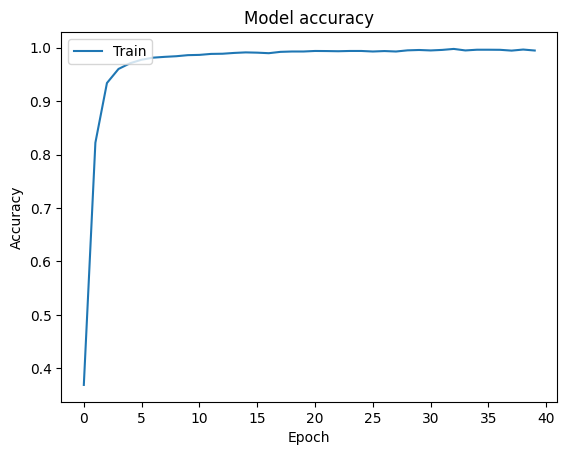

In [ ]:
plt.plot(history3.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
save_model("model_3", model_3)

In [ ]:
#change to CPU
# Load the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/trained_models/model_3.h5')
software_metrics(X_test, loaded_model)

1/1 [==============================] - 0s 29ms/step
Total predictions: 100
Time taken for predictions: 9.08 seconds


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 128, 128, 128)     1280      
                                                                 
 dropout_16 (Dropout)        (None, 128, 128, 128)     0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 dropout_17 (Dropout)        (None, 32, 32, 256)       0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                 

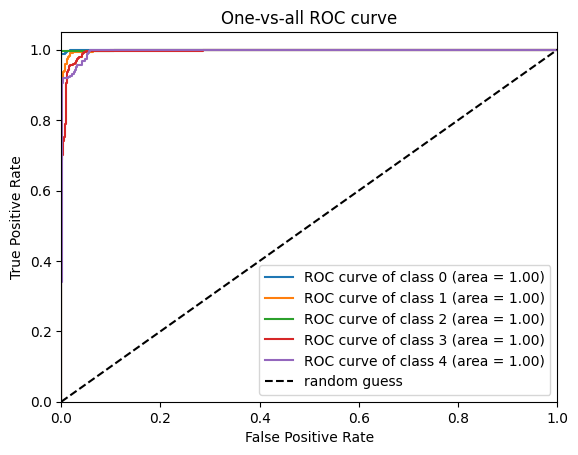

Confusion Matrix: 
 [[231  69   0   0   0]
 [  0 299   0   0   1]
 [  0   0 246  53   1]
 [  0   1   0 298   1]
 [  0  26   0   3 271]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       300
           1       0.76      1.00      0.86       300
           2       1.00      0.82      0.90       300
           3       0.84      0.99      0.91       300
           4       0.99      0.90      0.94       300

    accuracy                           0.90      1500
   macro avg       0.92      0.90      0.90      1500
weighted avg       0.92      0.90      0.90      1500



In [ ]:
model_4 = get_model_4()
history4 = train_model(X_train, y_train, X_test, y_test, model_4, 40)
test_model(X_test, model_4)

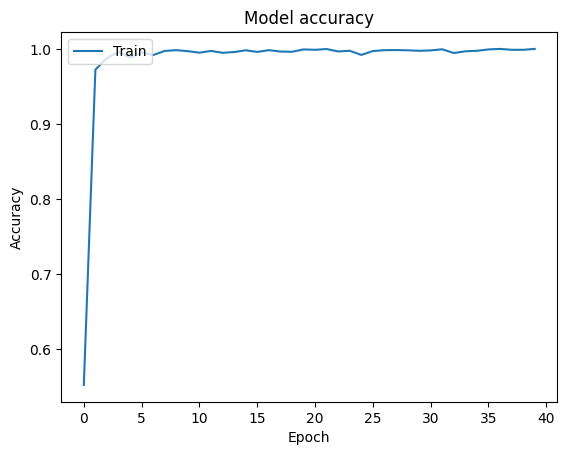

In [ ]:
plt.plot(history4.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
save_model("model_4", model_4)

In [ ]:
#change to CPU
# Load the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/trained_models/model_4.h5')
software_metrics(X_test, loaded_model)

1/1 [==============================] - 0s 41ms/step
Total predictions: 100
Time taken for predictions: 11.04 seconds


Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   3136        ['input_21[0][0]']               
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']             
                                                                                                  
 conv1/relu (Dense)             (None, 64, 64, 64)   4160        ['conv1/bn[0][0]']     

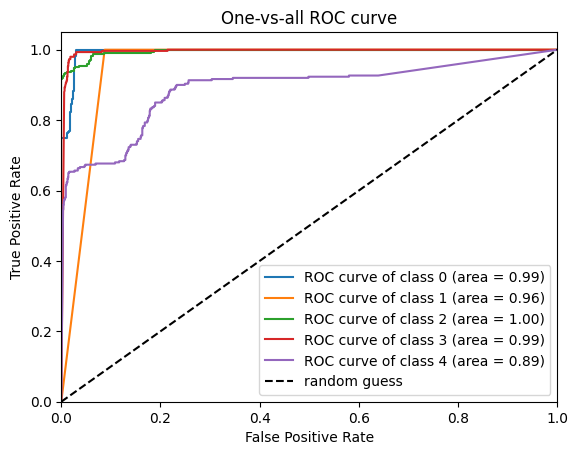

Confusion Matrix: 
 [[223  76   0   0   1]
 [  0 300   0   0   0]
 [  0  14 239  33  14]
 [  0   0   0 298   2]
 [  0 101   0   4 195]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.74      0.85       300
           1       0.61      1.00      0.76       300
           2       1.00      0.80      0.89       300
           3       0.89      0.99      0.94       300
           4       0.92      0.65      0.76       300

    accuracy                           0.84      1500
   macro avg       0.88      0.84      0.84      1500
weighted avg       0.88      0.84      0.84      1500



In [ ]:
model_5 = get_model_5()
history5 = train_model(X_train, y_train, X_test, y_test, model_5, 40)
test_model(X_test, model_5)

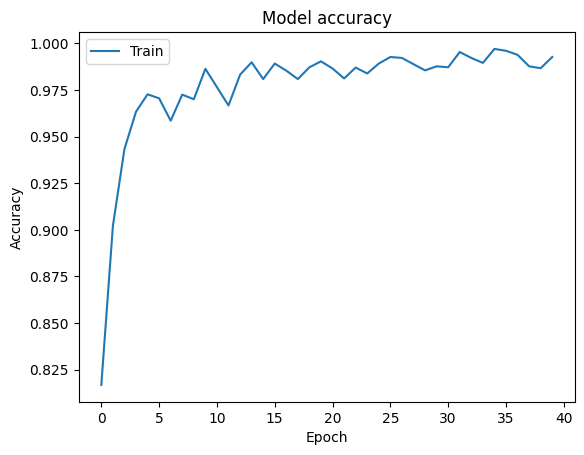

In [ ]:
plt.plot(history5.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
save_model("densenet121", model_5)

In [ ]:
#change to CPU
# Load the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/trained_models/densenet121.h5')
software_metrics(X_test, loaded_model)

1/1 [==============================] - 0s 137ms/step
Total predictions: 100
Time taken for predictions: 22.74 seconds


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_27 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 128)       7385

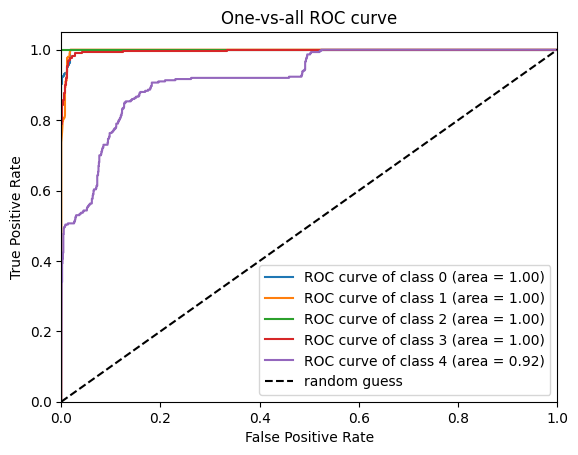

Confusion Matrix: 
 [[225  75   0   0   0]
 [  0 300   0   0   0]
 [  0   0 236  25  39]
 [  0   0   0 298   2]
 [  0  97   0  43 160]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       300
           1       0.64      1.00      0.78       300
           2       1.00      0.79      0.88       300
           3       0.81      0.99      0.89       300
           4       0.80      0.53      0.64       300

    accuracy                           0.81      1500
   macro avg       0.85      0.81      0.81      1500
weighted avg       0.85      0.81      0.81      1500



In [ ]:
model_6 = get_model_6()
history6 = train_model(X_train, y_train, X_test, y_test, model_6, 40)
test_model(X_test, model_6)

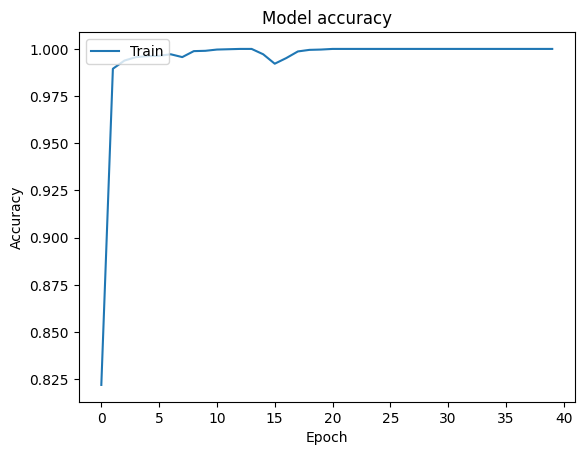

In [ ]:
plt.plot(history6.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
save_model("ResNet18", model_6)

In [ ]:
#change to CPU
# Load the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/trained_models/ResNet18.h5')
software_metrics(X_test, loaded_model)

1/1 [==============================] - 0s 46ms/step
Total predictions: 100
Time taken for predictions: 11.04 seconds


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_31 (Conv2D)             (None, 64, 64, 64)   3200        ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_23 (MaxPooling2D  (None, 31, 31, 64)  0           ['conv2d_31[0][0]']              
 )                                                                                                
                                                                                            

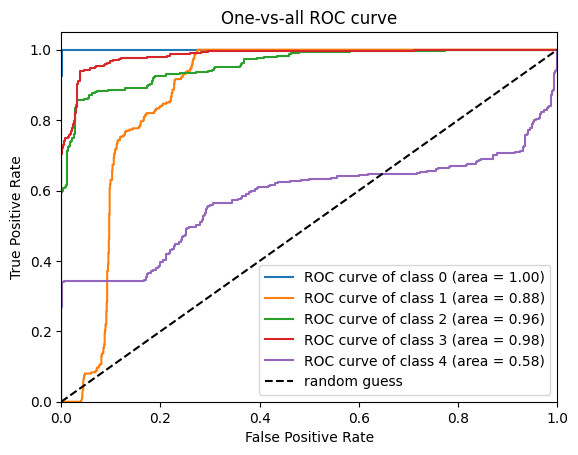

Confusion Matrix: 
 [[280  20   0   0   0]
 [  0 254   2  12  32]
 [  1   0 181  11 107]
 [  0  44   0 233  23]
 [  0 197   0   0 103]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       300
           1       0.49      0.85      0.62       300
           2       0.99      0.60      0.75       300
           3       0.91      0.78      0.84       300
           4       0.39      0.34      0.36       300

    accuracy                           0.70      1500
   macro avg       0.76      0.70      0.71      1500
weighted avg       0.76      0.70      0.71      1500



In [ ]:
model_7 = get_model_7()
history7 = train_model(X_train, y_train, X_test, y_test, model_7, 40)
test_model(X_test, model_7)

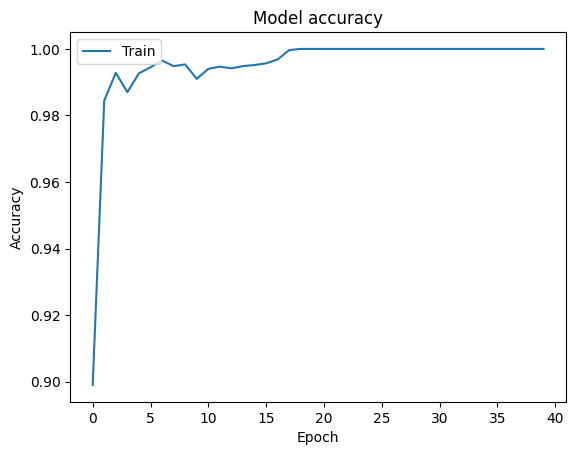

In [ ]:
plt.plot(history7.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
save_model("ResNet50", model_7)

In [ ]:
#change to CPU
# Load the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/trained_models/ResNet50.h5')
software_metrics(X_test, loaded_model)

1/1 [==============================] - 0s 149ms/step
Total predictions: 100
Time taken for predictions: 17.36 seconds


In [ ]:
#Getting hardware metrics:
#1. Latency 
#2. FPS
#3. Memory(RAM)

In [ ]:
import cv2

def get_flow_latency(model):
    test_video = cv2.VideoCapture('drive/MyDrive/iDroid/eye_recording_cropped.flv')
    
    is_frame_present, frame = test_video.read()
    while is_frame_present:


MODELs LOSS PLOT

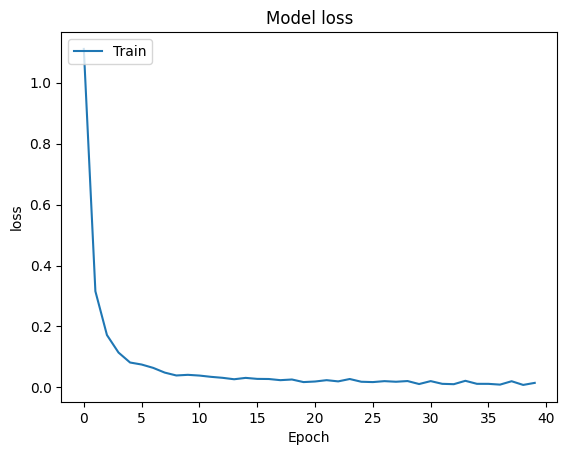

In [ ]:
plt.plot(history1.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

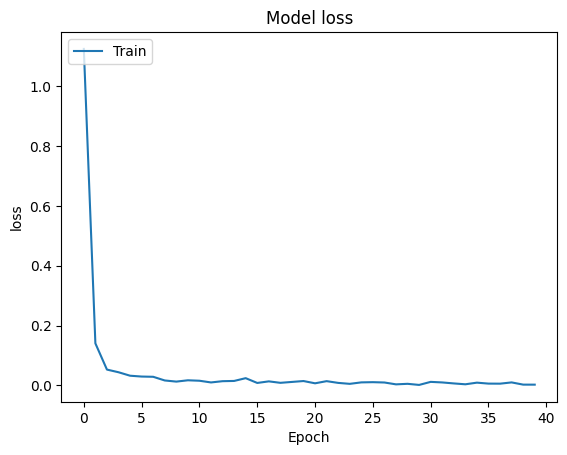

In [ ]:
plt.plot(history2.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

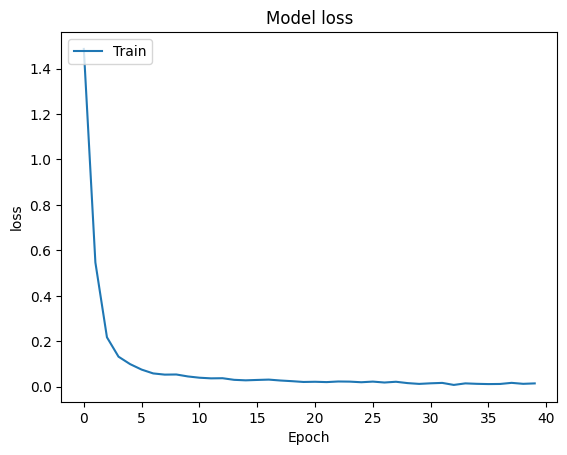

In [ ]:
plt.plot(history3.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

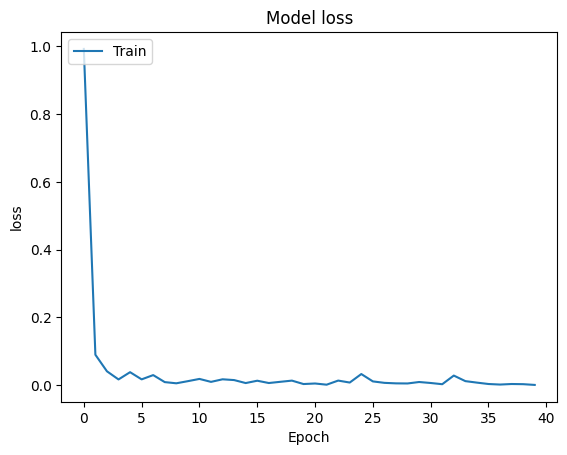

In [ ]:
plt.plot(history4.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

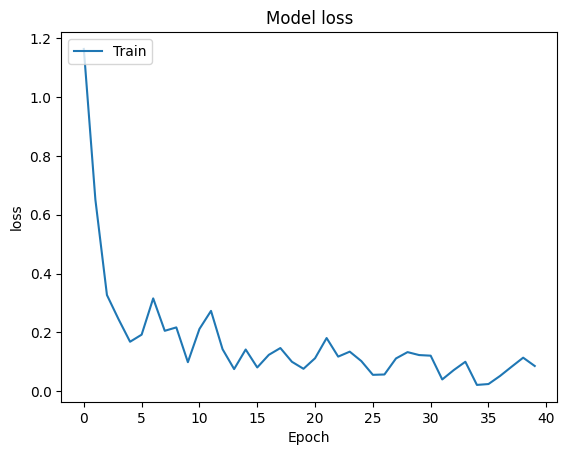

In [ ]:
plt.plot(history5.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

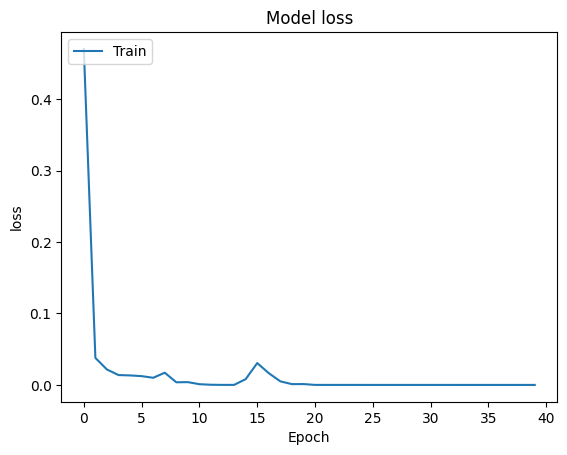

In [ ]:
plt.plot(history6.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

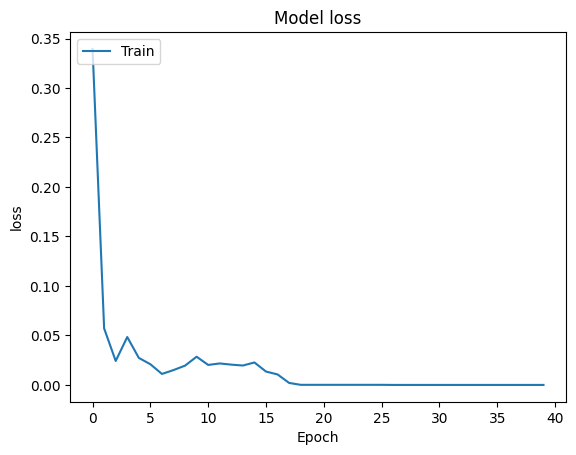

In [ ]:
plt.plot(history7.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()